In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install Pillow

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install -U scikit-image

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install python-resize-image

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install -U albumentations --no-binary qudida,albumentations

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install python-math

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install image-processing

Note: you may need to restart the kernel to use updated packages.


In [8]:
import cv2
import numpy
import pandas
from PIL import Image
from skimage import data, io, filters 
from resizeimage import resizeimage 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 
import skimage
from PIL.ExifTags import TAGS


In [9]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt' 
frozen_model = 'frozen_inference_graph.pb'

In [10]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)

In [11]:
import os
print("Current Working Directory:", os.getcwd())

Current Working Directory: /Users/dincabdullah/ImageProcess


In [12]:
classLables = [] #empty list of python 
file_name= "/Users/dincabdullah/ImageProcess/Label.txt"
with open(file_name,'rt') as fpt:
    classLables = fpt.read().rstrip('\n').split('\n')
    #classLables.append(fpt.read())

In [13]:
print(classLables)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [14]:
print(len(classLables))

80


In [15]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5) ## 255/2=127.5 model.setInputMean((127.5,127.5,127.5)) ## mobilnet => [-1,1] model.setInputSwapRB(True)

< cv2.dnn.Model 0x168661af0>

In [16]:
img = cv2.imread('/Users/dincabdullah/Downloads/archive/john-arano-LzxsSWAVMYs-unsplash.JPG')

In [17]:
image_inf = Image.open('/Users/dincabdullah/Downloads/archive/john-arano-LzxsSWAVMYs-unsplash.JPG')

In [18]:

info_dict = {
"Filename": image_inf.filename,
"Image Size": image_inf.size,
"Image Height": image_inf.height,
"Image Width": image_inf.width,
"Image Format": image_inf.format,
"Image Mode": image_inf.mode,
"Image is Animated": getattr(image_inf, "is_animated", False), "Frames in Image": getattr(image_inf, "n_frames", 1)
}
for label,value in info_dict.items(): print(f"{label:25}: {value}")

Filename                 : /Users/dincabdullah/Downloads/archive/john-arano-LzxsSWAVMYs-unsplash.JPG
Image Size               : (640, 959)
Image Height             : 959
Image Width              : 640
Image Format             : JPEG
Image Mode               : RGB
Image is Animated        : False
Frames in Image          : 1


In [19]:
exifdata = image_inf.getexif()

In [20]:
for tagid in exifdata:
# getting the tag name instead of tag id
    tagname = TAGS.get(tagid, tagid)
# passing the tagid to get its respective value
    value = exifdata.get(tagid)
    # printing the final result
    print(f"{tagname:25}: {value}")

In [21]:
print(type(image_inf))

<class 'PIL.JpegImagePlugin.JpegImageFile'>


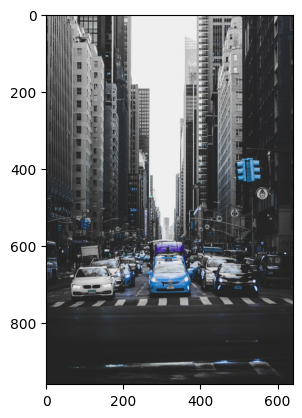

In [22]:
image = skimage.img_as_float(img) 
plt.imshow(image)

In [23]:
ClassIndex , confidece, bbox = model.detect(img, confThreshold=0.5)

In [24]:
print(ClassIndex)

[3 3 3 3 3 3 3 3 3]


In [30]:
font_scale = 2
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
 #cv2.rectangle(frame, (x,y),(x+w , y+h),(255,0,0),2)
 #cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale = fon
 cv2.rectangle(img, boxes,(0, 255, 0), 2)
 cv2.putText(img, classLables[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale=font_scale, color=(255, 255, 255), thickness=4)

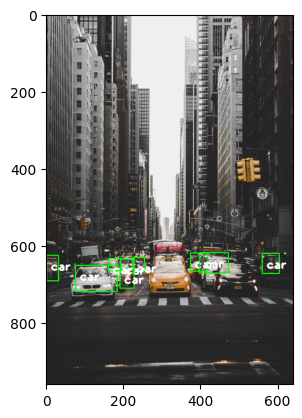

In [31]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [27]:
cv2.imwrite("test.JPG",img)

True